## Univariate plotting with pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../Datasets/AppleStore.csv')
df.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


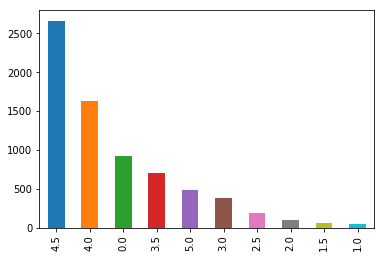

In [7]:
(df['user_rating'].value_counts()).plot.bar()

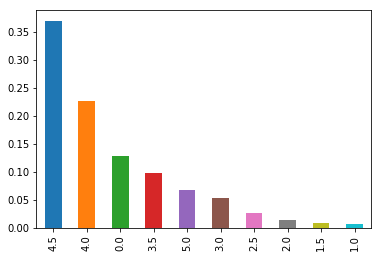

In [10]:
# Convert it into percentage (instead of absolute numbers)
(df['user_rating'].value_counts().head(10)/len(df)).plot.bar()

In [11]:
len(df)
# shows the count of rows with data.

7197

Bar charts are very flexible: the height of bars can represent numerical data (in-numbers), and category can represent almost anything, as long it is a category. Flexibility with visualisation--gives us a broad idea in application.

- Nominal Categories: these type don't make a lot of senset to order, like type of cheese, ZIP code.
- Ordinal Categories: these type do make sense to compare, like earthquake magnitudes, price of phones, et cetra.

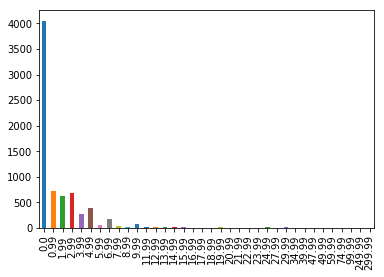

In [4]:
df['price'].value_counts().sort_index().plot.bar()

This bar graph, at the right end, plots seemingly little bars. This visual can be made more intutive and more broad by using line charts.

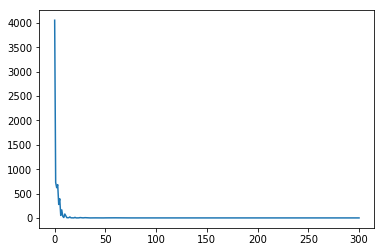

In [5]:
df['price'].value_counts().sort_index().plot.line()

It was prolly not a good idea.

**A line chart** can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories. Where distribution as a whole matters more than individual values.

**An Area Chart**: Similar to line, but area is filled and shaded in. As -

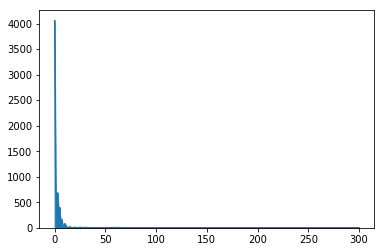

In [7]:
df['price'].value_counts().sort_index().plot.area()

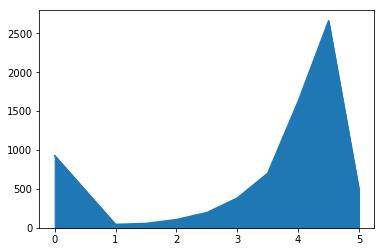

In [8]:
# Or a more intuitive column as user_rating

df['user_rating'].value_counts().sort_index().plot.area()

*Interval data* is a type, in which data is in intervals, and are already quantifiable. Hence, are easily workable. Histograms works well while visualising them.

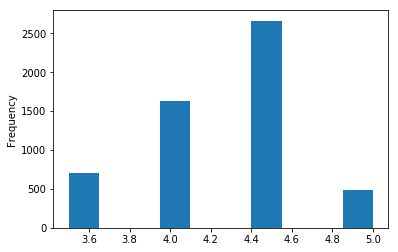

In [13]:
# df['user_rating'].plot.hist() : for all user ratings
df[df['user_rating'] > 3.0]['user_rating'].plot.hist()

**Histogram**

- Histograms don't just look like bar plots, they are in fact bar plots.
- They just have data splited in equal interval.
- The only analytical difference is they have bar representing an interval instead of a single value.
- They don't work well with skewed data.

## Bivariate plotting with pandas

Bivariate is looking (and plotting) two variables together.

Data without relationship is equivalent to Nickleback -- it is something, but it doesn't sound good.


In [4]:
# Let's work with a new dataset of pokemons.

poke = pd.read_csv('../Datasets/pokemon.csv')
poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


**Scattter Plot**: Bivariate plot in which variables of interest simply maps on a two dimension plane.

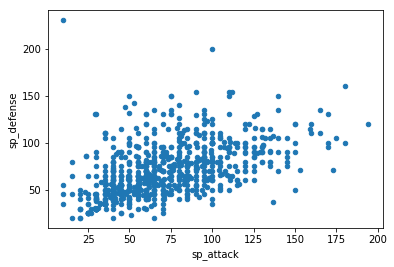

In [15]:
poke.plot.scatter(x='sp_attack', y='sp_defense')

A problem arises here is, points are overplotted, i.e., one on another.

One way is to sample the plot as
`poke.sample(100).plot.scatter(x='', y='')`. Taking 100 points at a time.

Another interesting way is to use a different plot type, as hexplot.

**Hexplot**: It aggregates points in space into hexagons (and then colorize those hexgons). 

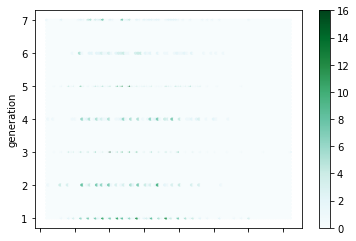

In [21]:
poke.plot.hexbin(x='speed', y='generation')

That is even thought a little sparse, and less attractive, but conveys meaning about generation of pokemon and average speed. No meaning--Duh!

Let's sample it.

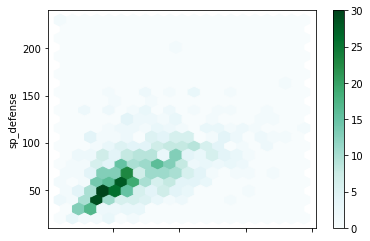

In [6]:
poke.plot.hexbin(x='sp_attack', y='sp_defense', gridsize=20)

A little more attractive after adjusting the gridsize.

*NOTE*: For good hex plots (and scatter plots), we need to help aleviate overplotting, thus, we have to take benefit from variables which can take on a wide range of unique values.

**Stacked Plots**: A stacked chart is one which plots the variables one on top of the other. Modification of bar plots.

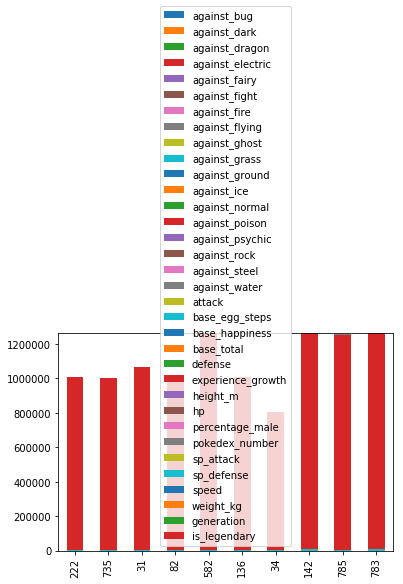

In [7]:
poke.sample(10).plot.bar(stacked=True)

# A lot of stairs up the stacks (due to large number of columns)

For a better-interpretable visual result, stacked plots, must contain upto 8 level of stairs, and variables with a set of unqiue values, or comparable interval values. 

Similarly, `.plot.line()` can form multivariate graphs by lines.